In [55]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from numpy.random import default_rng

In [56]:
seed = 0
np.random.seed(seed)

In [57]:
train_file = 'data/Lightning7_TRAIN'

In [58]:
test_file = 'data/Lightning7_TEST'

In [59]:
sampling_rate = 3

In [60]:
row_use = 30

# Prep Train Data

In [61]:
train_data = np.loadtxt(train_file)

In [62]:
rng = default_rng(12345)
rng.shuffle(train_data)

In [63]:
X_train = train_data[:,1:]

In [64]:
y_train = train_data[:,0]

In [65]:
print(X_train[0])

[-0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561 -0.65097561
 -0.65097561 -0.65097561 -0.65093307 -0.64180514 -0.621694   -0.63071892
 -0.6035662  -0.60363264 -0.60777691 -0.55870074 -0.52864676 -0.53208494
 -0.51795949 -0.50753326 -0.48676575 -0.46492024 -0.51302962 -0.47578661
 -0.53323181 -0.45951077 -0.5250414  -0.48095923 -0.44737293 -0.51463244
 -0.44671201 -0.48598847 -0.51744012 -0.53889261 -0.5322133  -0.4757596
 -0.51152365 -0.52108248 -0.45546058 -0.44095771 -0.

In [66]:
print(y_train)

[5. 5. 5. 3. 6. 2. 0. 2. 5. 3. 2. 2. 5. 4. 6. 5. 0. 3. 3. 2. 0. 3. 4. 2.
 6. 1. 1. 5. 5. 4. 5. 6. 5. 1. 3. 3. 5. 5. 6. 5. 0. 0. 6. 6. 3. 2. 0. 6.
 5. 1. 5. 3. 1. 1. 6. 5. 4. 1. 3. 0. 3. 3. 4. 5. 1. 6. 0. 2. 5. 5.]


In [67]:
X_train.shape

(70, 319)

In [68]:
y_train.shape

(70,)

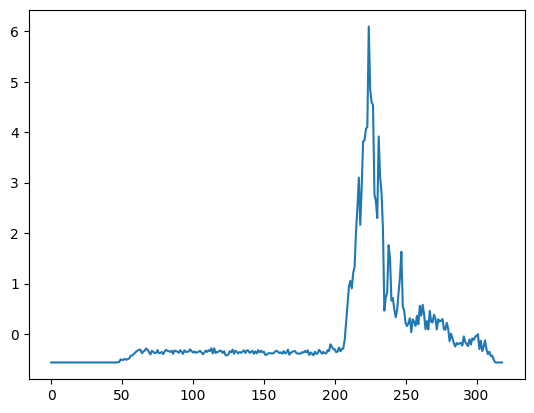

In [69]:
plt.plot(X_train[1])
plt.show()

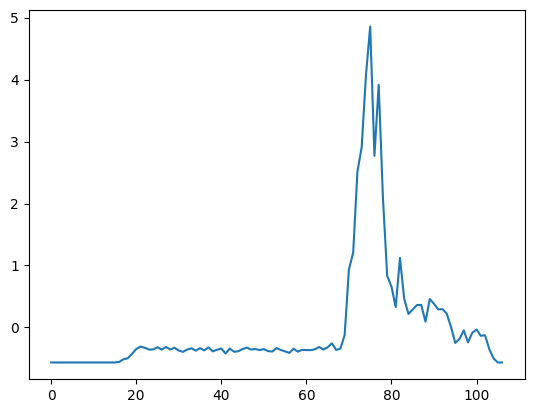

In [70]:
plt.plot(X_train[1, ::sampling_rate])
plt.show()

In [71]:
X_train_sampling = X_train[:row_use, ::sampling_rate]

In [72]:
X_train_sampling.shape

(30, 107)

# Prep Test Data

In [73]:
test_data = np.loadtxt(test_file)

In [74]:
rng = default_rng(12345)
rng.shuffle(test_data)

In [75]:
X_test = test_data[:,1:]

In [76]:
y_test = test_data[:,0]

In [77]:
print(X_test[0])

[-5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01
 -5.2376708e-01 -5.2376708e-01 -5.2376708e-01 -5.1090922e-01
 -3.9876421e-01 -4.8325682e-01 -4.8324018e-01 -4.4103423e-01
 -3.7927396e-01 -2.1647172e-01 -2.7186653e-01 -8.9589697e-02
 -1.6860825e-01  1.2966871e-01 -2.1094925e-01 -2.5020777e-01
 -3.0155374e-01 -2.57355

In [78]:
print(y_test[0])

1.0


In [79]:
X_test_sampling = X_test[:row_use, ::sampling_rate]

In [80]:
X_test_sampling.shape

(30, 107)

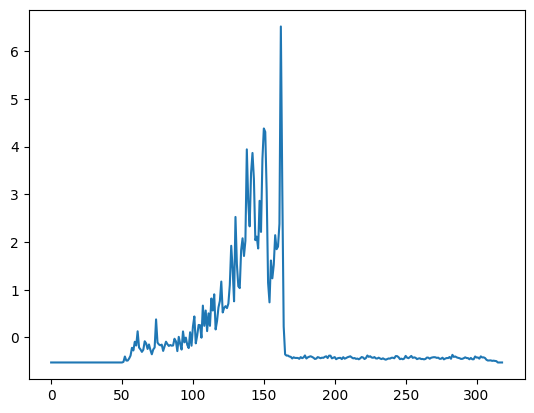

In [81]:
plt.plot(X_test[0])
plt.show()

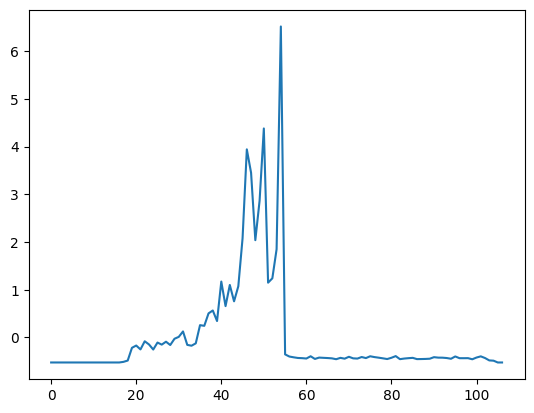

In [82]:
plt.plot(X_test_sampling[0])
plt.show()

# Train Model

In [83]:
def DTW(a, b):
    # ถ้า DTW  ทำช้าอาจต้องทำ sampling เพื่อลดปริมาณ data ทำ DTW จะได้เร็วขึ้น    
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0
    
    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

In [84]:
def DTWWithWeightNeighborCell(a,b,**kwargs):
    # print("weight",kwargs["alpha"],kwargs["beta"],kwargs["gamma"])
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0
    
    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([kwargs["alpha"]*cumdist[ai, bi+1],
                                   kwargs["beta"]*cumdist[ai, bi],
                                   kwargs["gamma"]*cumdist[ai+1, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

# Test Symmetric Model

In [85]:
clf = KNeighborsClassifier(metric =DTW,n_neighbors=1,n_jobs=-1)
clf.fit(X_train_sampling, y_train[0:row_use])

KNeighborsClassifier(metric=<function DTW at 0x000001A9A6807E20>, n_jobs=-1,
                     n_neighbors=1)

In [86]:
y_pred = clf.predict(X_test_sampling)

In [87]:
print(classification_report(y_test[0:row_use], y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       1.00      0.50      0.67         2
         2.0       1.00      1.00      1.00         3
         3.0       0.50      0.67      0.57         3
         4.0       1.00      0.50      0.67         4
         5.0       0.82      0.90      0.86        10
         6.0       0.50      1.00      0.67         2

    accuracy                           0.80        30
   macro avg       0.83      0.77      0.76        30
weighted avg       0.86      0.80      0.80        30



# Create Model with weight neighboring cells [Test Asymmetric]

In [88]:
def createMetricParams(alphaMax,betaMax,gammaMax):
    metricParamsArray = []
    for i in range(1,alphaMax+1):
        for j in range(1,betaMax+1):
            for k in range(1,gammaMax+1):
                if (i == k):
                    continue
                metricParam = {"alpha":i,"beta":j,"gamma":k}
                metricParamsArray.append(metricParam)
    return metricParamsArray

In [89]:
createMetricParams(4,4,4)

[{'alpha': 1, 'beta': 1, 'gamma': 2},
 {'alpha': 1, 'beta': 1, 'gamma': 3},
 {'alpha': 1, 'beta': 1, 'gamma': 4},
 {'alpha': 1, 'beta': 2, 'gamma': 2},
 {'alpha': 1, 'beta': 2, 'gamma': 3},
 {'alpha': 1, 'beta': 2, 'gamma': 4},
 {'alpha': 1, 'beta': 3, 'gamma': 2},
 {'alpha': 1, 'beta': 3, 'gamma': 3},
 {'alpha': 1, 'beta': 3, 'gamma': 4},
 {'alpha': 1, 'beta': 4, 'gamma': 2},
 {'alpha': 1, 'beta': 4, 'gamma': 3},
 {'alpha': 1, 'beta': 4, 'gamma': 4},
 {'alpha': 2, 'beta': 1, 'gamma': 1},
 {'alpha': 2, 'beta': 1, 'gamma': 3},
 {'alpha': 2, 'beta': 1, 'gamma': 4},
 {'alpha': 2, 'beta': 2, 'gamma': 1},
 {'alpha': 2, 'beta': 2, 'gamma': 3},
 {'alpha': 2, 'beta': 2, 'gamma': 4},
 {'alpha': 2, 'beta': 3, 'gamma': 1},
 {'alpha': 2, 'beta': 3, 'gamma': 3},
 {'alpha': 2, 'beta': 3, 'gamma': 4},
 {'alpha': 2, 'beta': 4, 'gamma': 1},
 {'alpha': 2, 'beta': 4, 'gamma': 3},
 {'alpha': 2, 'beta': 4, 'gamma': 4},
 {'alpha': 3, 'beta': 1, 'gamma': 1},
 {'alpha': 3, 'beta': 1, 'gamma': 2},
 {'alpha': 3

In [90]:
parameters = {'n_neighbors':[1],'metric_params':createMetricParams(5,5,5)}
clf = GridSearchCV(KNeighborsClassifier(metric =DTWWithWeightNeighborCell), parameters, cv=2,verbose=10,n_jobs=-1)
clf.fit(X_train_sampling, y_train[0:row_use])

Fitting 2 folds for each of 100 candidates, totalling 200 fits


GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(metric=<function DTWWithWeightNeighborCell at 0x000001A9A98B3C70>),
             n_jobs=-1,
             param_grid={'metric_params': [{'alpha': 1, 'beta': 1, 'gamma': 2},
                                           {'alpha': 1, 'beta': 1, 'gamma': 3},
                                           {'alpha': 1, 'beta': 1, 'gamma': 4},
                                           {'alpha': 1, 'beta': 1, 'gamma': 5},
                                           {'alpha': 1, 'beta': 2, 'gamma': 2},
                                           {'alpha': 1, 'beta': 2, 'gamma': 3},
                                           {'alpha': 1, '...
                                           {'alpha': 1, 'beta': 5, 'gamma': 5},
                                           {'alpha': 2, 'beta': 1, 'gamma': 1},
                                           {'alpha': 2, 'beta': 1, 'gamma': 3},
                                           {'alpha': 2, 'beta': 1, 'gamma': 4},
                                           {'alpha': 2, 'beta': 1, 'gamma': 5},
                                           {'alpha': 2, 'beta': 2, 'gamma': 1},
                                           {'alpha': 2, 'beta': 2, 'gamma': 3},
                                           {'alpha': 2, 'beta': 2, 'gamma': 4},
                                           {'alpha': 2, 'beta': 2, 'gamma': 5},
                                           {'alpha': 2, 'beta': 3, 'gamma': 1},
                                           {'alpha': 2, 'beta': 3, 'gamma': 3}, ...],
                         'n_neighbors': [1]},
             verbose=10)

In [91]:
grid_search_result = clf.cv_results_
grid_search_result_pd = pd.DataFrame.from_dict(grid_search_result)

In [92]:
grid_search_result_pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric_params,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002004,3.814697e-06,57.074455,0.076996,"{'alpha': 1, 'beta': 1, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.333333,0.6,0.466667,0.133333,17
1,0.001501,4.990101e-04,57.524462,0.086004,"{'alpha': 1, 'beta': 1, 'gamma': 3}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.6,0.500000,0.100000,1
2,0.000996,2.980232e-06,57.409468,0.258008,"{'alpha': 1, 'beta': 1, 'gamma': 4}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.6,0.500000,0.100000,1
3,0.001497,4.969835e-04,57.516966,0.157505,"{'alpha': 1, 'beta': 1, 'gamma': 5}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.6,0.500000,0.100000,1
4,0.001001,2.622604e-06,57.319962,0.045494,"{'alpha': 1, 'beta': 2, 'gamma': 2}",1,"{'metric_params': {'alpha': 1, 'beta': 2, 'gam...",0.266667,0.4,0.333333,0.066667,21
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000500,5.002022e-04,60.484741,0.254418,"{'alpha': 5, 'beta': 4, 'gamma': 4}",1,"{'metric_params': {'alpha': 5, 'beta': 4, 'gam...",0.266667,0.4,0.333333,0.066667,21
96,0.000000,0.000000e+00,38.335699,0.030002,"{'alpha': 5, 'beta': 5, 'gamma': 1}",1,"{'metric_params': {'alpha': 5, 'beta': 5, 'gam...",0.266667,0.4,0.333333,0.066667,21
97,0.000500,5.004406e-04,38.297215,0.380507,"{'alpha': 5, 'beta': 5, 'gamma': 2}",1,"{'metric_params': {'alpha': 5, 'beta': 5, 'gam...",0.266667,0.4,0.333333,0.066667,21
98,0.001000,1.192093e-07,37.461035,0.363636,"{'alpha': 5, 'beta': 5, 'gamma': 3}",1,"{'metric_params': {'alpha': 5, 'beta': 5, 'gam...",0.266667,0.4,0.333333,0.066667,21


In [93]:
grid_search_result_pd[grid_search_result_pd['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric_params,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001501,4.990101e-04,57.524462,0.086004,"{'alpha': 1, 'beta': 1, 'gamma': 3}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.600000,0.5,0.100000,1
2,0.000996,2.980232e-06,57.409468,0.258008,"{'alpha': 1, 'beta': 1, 'gamma': 4}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.600000,0.5,0.100000,1
3,0.001497,4.969835e-04,57.516966,0.157505,"{'alpha': 1, 'beta': 1, 'gamma': 5}",1,"{'metric_params': {'alpha': 1, 'beta': 1, 'gam...",0.400000,0.600000,0.5,0.100000,1
20,0.001000,8.344650e-07,58.904172,0.317997,"{'alpha': 2, 'beta': 1, 'gamma': 1}",1,"{'metric_params': {'alpha': 2, 'beta': 1, 'gam...",0.533333,0.466667,0.5,0.033333,1
21,0.001001,1.311302e-06,58.810674,0.350505,"{'alpha': 2, 'beta': 1, 'gamma': 3}",1,"{'metric_params': {'alpha': 2, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1
22,0.000501,5.007982e-04,59.047113,0.217499,"{'alpha': 2, 'beta': 1, 'gamma': 4}",1,"{'metric_params': {'alpha': 2, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1
23,0.000996,2.980232e-06,59.536117,0.220501,"{'alpha': 2, 'beta': 1, 'gamma': 5}",1,"{'metric_params': {'alpha': 2, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1
41,0.000999,9.536743e-07,58.082458,0.078995,"{'alpha': 3, 'beta': 1, 'gamma': 2}",1,"{'metric_params': {'alpha': 3, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1
42,0.001000,2.622604e-06,58.083956,0.053504,"{'alpha': 3, 'beta': 1, 'gamma': 4}",1,"{'metric_params': {'alpha': 3, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1
43,0.000999,5.960464e-07,58.183953,0.120500,"{'alpha': 3, 'beta': 1, 'gamma': 5}",1,"{'metric_params': {'alpha': 3, 'beta': 1, 'gam...",0.466667,0.533333,0.5,0.033333,1


In [94]:
model = clf.best_estimator_

In [95]:
print(model.get_params)

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric=<function DTWWithWeightNeighborCell at 0x000001A9A98B3C70>,
                     metric_params={'alpha': 1, 'beta': 1, 'gamma': 3},
                     n_neighbors=1)>


In [96]:
y_pred = model.predict(X_test_sampling)
print(classification_report(y_test[0:row_use], y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       0.00      0.00      0.00         2
         2.0       1.00      1.00      1.00         3
         3.0       0.50      0.67      0.57         3
         4.0       0.67      0.50      0.57         4
         5.0       0.82      0.90      0.86        10
         6.0       0.50      0.50      0.50         2

    accuracy                           0.77        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.72      0.77      0.74        30



c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pakorn Kongrit\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dump Best Asym model

In [97]:
model_file = open('knn_Best_Asym_Lightning7.model', 'wb')
pickle.dump(model, model_file)
model_file.close()

จาก db Lighting7 เราจะเห็นว่า Symmetric ดีกว่า Asymmetric